# Uczenie Maszynowe - Wykład 5

Klasteryzacja to technika uczenia maszynowego bez nadzoru, która służy do grupowania podobnych obiektów w zbiory na podstawie ich cech. W przeciwieństwie do uczenia nadzorowanego, klasteryzacja nie korzysta z oznaczonych danych (brak etykiet klas) – model samodzielnie szuka struktur i wzorców w danych.

Główne cechy klasteryzacji:

    Uczenie bez nadzoru: Brak etykiet klas dla danych wejściowych.
    Cel: Odkrycie ukrytych struktur w danych.
    Zastosowanie: Identyfikacja grup (klastrów) w zbiorze danych.
    
Typowe algorytmy klasteryzacji:

    KMeans: Algorytm iteracyjny, który minimalizuje odległości punktów od centrów klastrów.
    DBSCAN: Algorytm gęstościowy, który identyfikuje klastry jako grupy gęsto upakowanych punktów.
    Hierarchiczna klasteryzacja: Tworzenie hierarchicznej struktury klastrów w postaci drzewa.
    
## K-Means

To często używany i względnie prosty algorytm klasteryzacyjny.
W nim, każdy klaster jest reprezentowany przez swój centroid. Algorytm działa w sposób iteracyjny:

    Inicjalizuj losowo K centroidów.
    Przypisz każdy punkt do najbliższego centroidu.
    Zaktualizuj centroidy, obliczając średnią punktów w każdym klastrze.
    Powtarzaj, aż centroidy ustabilizują się.
    
Algorytm jest prosty, szybki, ale wymaga określenia liczby klas K z góry.

<img src='img/kmean.gif' img/>


### 2. Klasteryzacja hierarchiczna

Metoda ta buduje dendrogram - drzewo przedstawiające podobieństwo obiektów.
Wyróżniamy dwa typy:
  - **Aglomeracyjne**: Począc od każdego obiektu będącego w jednej, osobnej klasie - łączy je.
  - **Deglomarycyjne**: Zaczyba od wielkiego klastra, który jest stopniowo dzielony.

Zalety:

    Nie ma potrzeby określania liczby klastrów
    Zapewnia hierarchię klastrów

Wady:

    Obliczeniowo obciążający


C:\Users\kamil\AppData\Local\Temp\ipykernel_18324\2903084872.py:3: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 1.21.5)
  from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


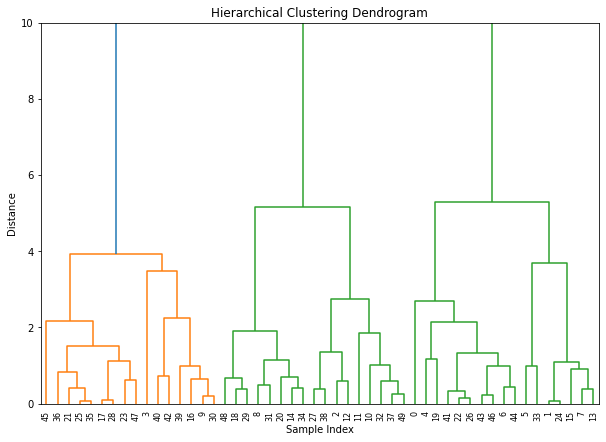

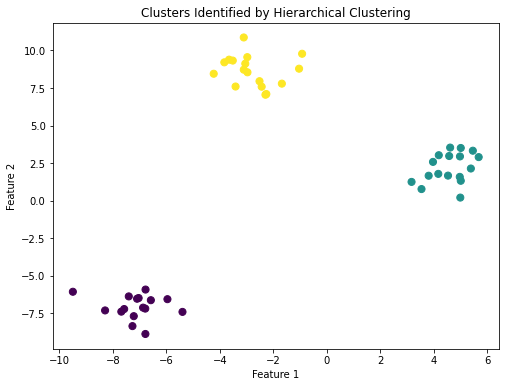

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.datasets import make_blobs

# Generate synthetic data
X, _ = make_blobs(n_samples=50, centers=3, cluster_std=1.0, random_state=42)

# Perform hierarchical clustering
linkage_matrix = linkage(X, method='ward')  # Ward's method minimizes variance within clusters

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.ylim(0,10)
plt.show()

# Set a threshold to create flat clusters
threshold = 6
clusters = fcluster(linkage_matrix, t=threshold, criterion='distance')

# Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=50)
plt.title("Clusters Identified by Hierarchical Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


## 3. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

Grupuje punkty, które są zbliżone do siebie na podstawie progu. Odfiltrowuje punkty, które uważane są za "szum".

Kluczowe parametry:
    eps: Maksymalny dystans między punktami, który dopuszczony jest w klastrze.
    min_samples: Minimalna liczba puntków w klastrze.

Pros:
    
    Nie wymaga określenia liczby klastrów
    Odkrywa klastry o nieregularnych kształtach
    Odporny na wartości odstająće

Cons:

    Czuły na swoje hiperparametry


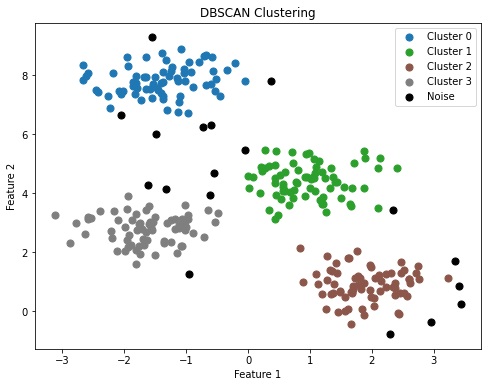

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)

# Plot the results
plt.figure(figsize=(8, 6))
unique_labels = set(labels)
colors = [plt.cm.tab10(each) for each in np.linspace(0, 1, len(unique_labels))]

for label, color in zip(unique_labels, colors):
    if label == -1:
        # Black used for noise
        color = [0, 0, 0, 1]
    
    cluster_points = X[labels == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=[color], s=50, label=f'Cluster {label}' if label != -1 else 'Noise')

plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


## Ocena klasteryzacji - dostępny prawidłowy podział

Podczas oceny wydajności klasteryzacji niektóre miary wymagają prawidłowego podziału (ground truth). Te miary mierzą, jak dobrze przewidywane klastry pokrywają się z rzeczywistymi etykietami klas. Poniżej znajdują się najważniejsze miary wraz z przykładami kodu.

### Skorygowany Wskaźnik Randa (ARI)
Skorygowany Wskaźnik Randa mierzy podobieństwo między dwiema klasteryzacjami danych, analizując wszystkie pary punktów i licząc te, które są poprawnie sklasyfikowane. Wskaźnik jest skorygowany o przypadkowe dopasowanie i przyjmuje wartości od -1 (brak zgodności) do 1 (idealna zgodność).

Przykład kodu:
```python
from sklearn.metrics import adjusted_rand_score

# Wzorcowe etykiety
y_true = [0, 0, 1, 1, 2, 2]

# Przewidywane etykiety klastrów
y_pred = [0, 0, 1, 1, 2, 2]

# Obliczanie ARI
ari = adjusted_rand_score(y_true, y_pred)
print(f"Skorygowany Wskaźnik Randa (ARI): {ari:.2f}")
```

### Znormalizowana Wzajemna Informacja (NMI)
Znormalizowana Wzajemna Informacja ocenia ilość informacji wspólnej między rzeczywistymi etykietami a przewidywanymi klastrami. Wynik jest znormalizowany i mieści się w zakresie od 0 (brak wspólnej informacji) do 1 (idealna korelacja).

Przykład kodu:
```python
from sklearn.metrics import normalized_mutual_info_score

# Wzorcowe etykiety
y_true = [0, 0, 1, 1, 2, 2]

# Przewidywane etykiety klastrów
y_pred = [1, 1, 0, 0, 2, 2]

# Obliczanie NMI
nmi = normalized_mutual_info_score(y_true, y_pred)
print(f"Znormalizowana Wzajemna Informacja (NMI): {nmi:.2f}")
```

### Jednorodność, Kompletnosć i Miara V
Jednorodność: Wszystkie klastry zawierają wyłącznie punkty należące do jednej klasy.
Kompletność: Wszystkie punkty z danej klasy są w tym samym klastrze.
Miara V: Średnia harmoniczna jednorodności i kompletności.
Przykład kodu:
```python
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score

# Wzorcowe etykiety
y_true = [0, 0, 1, 1, 2, 2]

# Przewidywane etykiety klastrów
y_pred = [1, 1, 0, 0, 2, 2]

# Obliczanie jednorodności, kompletności i miary V
jednorodnosc = homogeneity_score(y_true, y_pred)
kompletnosc = completeness_score(y_true, y_pred)
miara_v = v_measure_score(y_true, y_pred)

print(f"Jednorodność: {jednorodnosc:.2f}")
print(f"Kompletność: {kompletnosc:.2f}")
print(f"Miara V: {miara_v:.2f}")
```

### Podsumowanie
Powyższe metryki dostarczają cennych informacji na temat jakości klasteryzacji, jeśli dostępne są wzorcowe etykiety. Skorygowany Wskaźnik Randa (ARI) i Znormalizowana Wzajemna Informacja (NMI) są szeroko stosowane do ogólnej oceny, podczas gdy Jednorodność, Kompletność i Miara V pozwalają na bardziej szczegółową analizę jakości klastrów. Wybieraj metrykę, która najlepiej pasuje do celów klasteryzacji.

C:\Users\kamil\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\kamil\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\kamil\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\kamil\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmea

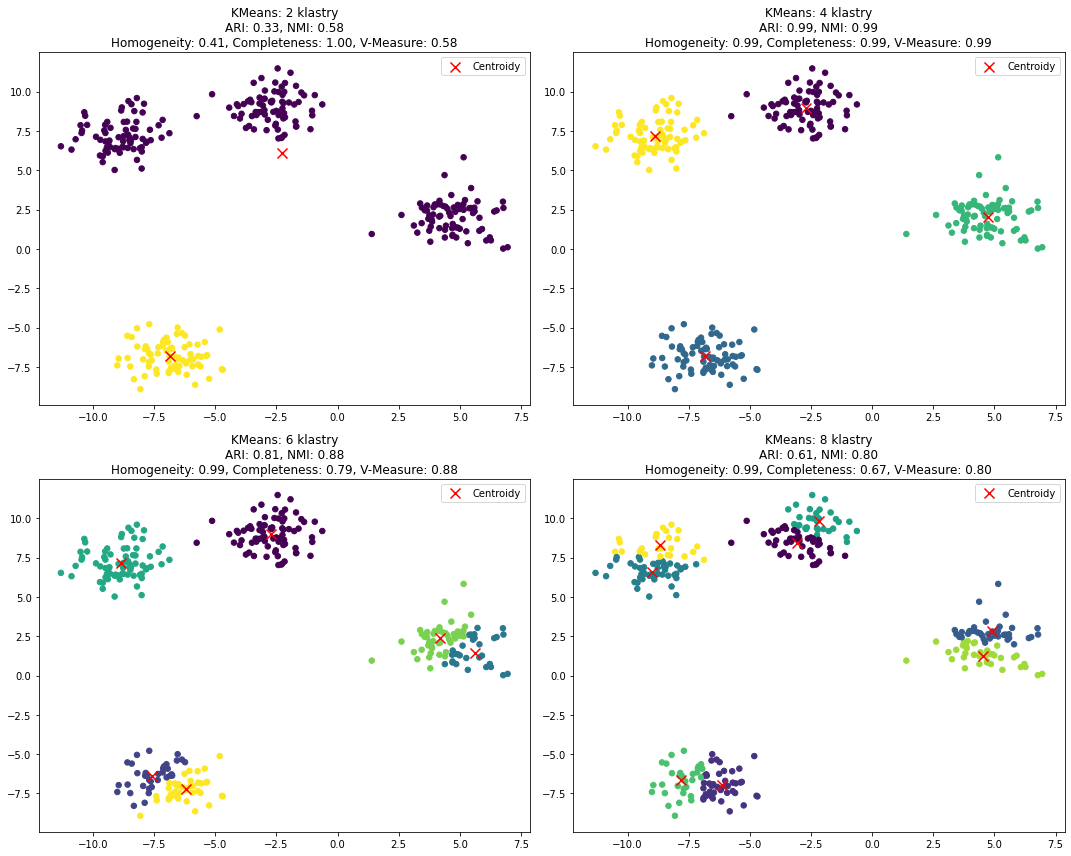

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, completeness_score, v_measure_score

# Generowanie zbioru danych
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# Funkcja do wizualizacji wyników dla różnych liczby klastrów
def visualize_clustering_for_different_k():
    cluster_counts = [2, 4, 6, 8]  # Różne liczby klastrów
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.ravel()

    for i, k in enumerate(cluster_counts):
        # Klasteryzacja KMeans
        kmeans = KMeans(n_clusters=k, random_state=42)
        y_pred = kmeans.fit_predict(X)

        # Obliczanie miar jakości klasteryzacji
        ari = adjusted_rand_score(y_true, y_pred)
        nmi = normalized_mutual_info_score(y_true, y_pred)
        homogeneity = homogeneity_score(y_true, y_pred)
        completeness = completeness_score(y_true, y_pred)
        v_measure = v_measure_score(y_true, y_pred)

        # Wizualizacja
        axes[i].scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', s=30)
        axes[i].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=100, label='Centroidy')
        axes[i].set_title(f"KMeans: {k} klastry\nARI: {ari:.2f}, NMI: {nmi:.2f}\nHomogeneity: {homogeneity:.2f}, Completeness: {completeness:.2f}, V-Measure: {v_measure:.2f}")
        axes[i].legend()

    plt.tight_layout()
    plt.show()

# Wywołanie funkcji
visualize_clustering_for_different_k()


## Ocena klasteryzacji - prawidłowy podział niedostępny

Gdy brak jest wzorcowych etykiet (ground truth), wydajność klasteryzacji można oceniać za pomocą metryk wewnętrznych. Te metryki mierzą jakość klasteryzacji na podstawie właściwości takich jak spójność (kompaktowość klastrów) i separacja (odległość między klastrami). Poniżej przedstawiono najważniejsze metryki wraz z przykładami kodu

### Wskaźnik Sylwetki (Silhouette Score)
Wskaźnik Sylwetki mierzy, jak bardzo dany punkt jest podobny do punktów z własnego klastra w porównaniu do punktów z innych klastrów. Wynik mieści się w zakresie od -1 (zła klasteryzacja) do 1 (idealna klasteryzacja).

```
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generowanie danych syntetycznych
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

# Klasteryzacja za pomocą K-Means
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
labels = kmeans.labels_

# Obliczanie Wskaźnika Sylwetki
sil_score = silhouette_score(X, labels)
print(f"Wskaźnik Sylwetki: {sil_score:.2f}")
```

### Indeks Daviesa-Bouldina
Indeks Daviesa-Bouldina mierzy średni stosunek podobieństwa każdego klastra do najbardziej podobnego innego klastra. Niższe wartości wskazują na lepszą klasteryzację.

```
from sklearn.metrics import davies_bouldin_score

# Obliczanie Indeksu Daviesa-Bouldina
db_score = davies_bouldin_score(X, labels)
print(f"Indeks Daviesa-Bouldina: {db_score:.2f}")
```

### Indeks Calinskiego-Harabasza
Indeks Calinskiego-Harabasza, znany również jako Kryterium Współczynnika Zmienności, ocenia wydajność klasteryzacji na podstawie stosunku rozproszenia między klastrami do rozproszenia wewnątrz klastrów. Wyższe wartości oznaczają lepszą klasteryzację.

```
from sklearn.metrics import calinski_harabasz_score

# Obliczanie Indeksu Calinskiego-Harabasza
ch_score = calinski_harabasz_score(X, labels)
print(f"Indeks Calinskiego-Harabasza: {ch_score:.2f}")
```


### Podsumowanie

Powyższe metryki wewnętrzne dostarczają cennych informacji na temat jakości klasteryzacji, gdy brak wzorcowych etykiet. Wskaźnik Sylwetki i Indeks Daviesa-Bouldina koncentrują się na kompaktowości i separacji klastrów, natomiast Indeks Calinskiego-Harabasza ocenia balans wariancji klastrów. Wybierz metrykę, która najlepiej pasuje do Twoich celów klasteryzacji.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.datasets import make_blobs
from ipywidgets import interact

# Define a function for clustering and visualization
def clustering_example(std_dev=0.6, n_clusters=4):
    # Generate synthetic data
    X, _ = make_blobs(n_samples=300, centers=4, cluster_std=std_dev, random_state=42)

    # Perform clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
    labels = kmeans.labels_

    # Compute clustering metrics
    sil_score = silhouette_score(X, labels)
    db_score = davies_bouldin_score(X, labels)
    ch_score = calinski_harabasz_score(X, labels)

    # Display metrics
    print("Clustering Metrics:")
    print(f"  Silhouette Score: {sil_score:.2f}")
    print(f"  Davies-Bouldin Index: {db_score:.2f}")
    print(f"  Calinski-Harabasz Index: {ch_score:.2f}")

    # Visualize clustering
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='X', label='Centroids')
    plt.title("K-Means Clustering")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

# Create interactive widget
interact(clustering_example, std_dev=(0.1, 4.0, 0.4), n_clusters=(2, 10, 1))


interactive(children=(FloatSlider(value=0.6, description='std_dev', max=4.0, min=0.1, step=0.4), IntSlider(val…

<function __main__.clustering_example(std_dev=0.6, n_clusters=4)>

## Redukcja wymiarowości

Redukcja wymiarowości to inny typ uczenie nienadzorowanego, którego zadaniem jest ekstrakcja najważniejszych cech z danych przy redukcji (kompresji) tych danych. Jej celem jest:

    Zmniejszenie wymiarowości danych
    Wizualizacja danych (redukcja do 2 lub 3 wymiarów)

### PCA - Analiza Głównych Składowych

PCA (Principal Component Analysis) to technika redukcji wymiarowości, która przekształca dane do nowej przestrzeni z mniejszą liczbą wymiarów, zachowując jak najwięcej informacji (wariancji danych).

Jak działa PCA:

    1. Standaryzacja danych: Przekształcenie danych do tej samej skali.
    
    2. Obliczenie macierzy kowariancji: Wykrywanie relacji między zmiennymi.
    
    3. Wyznaczenie wartości własnych i wektorów własnych: Identyfikacja kierunków największej wariancji.
    
    4. Projekcja na nowe osie: Przekształcenie danych do przestrzeni głównych składowych.

C:\Users\kamil\AppData\Local\Temp\ipykernel_18324\208706707.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=30, cmap='viridis')


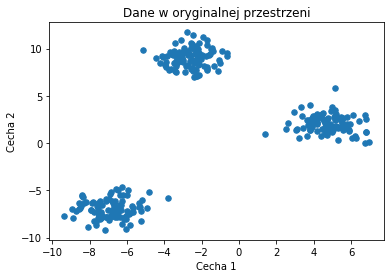

C:\Users\kamil\AppData\Local\Temp\ipykernel_18324\208706707.py:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca, np.zeros_like(X_pca), s=30, cmap='viridis')


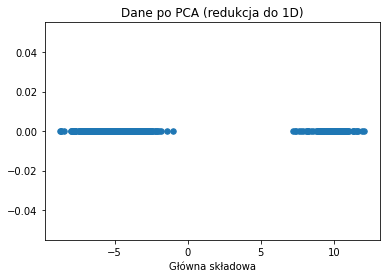

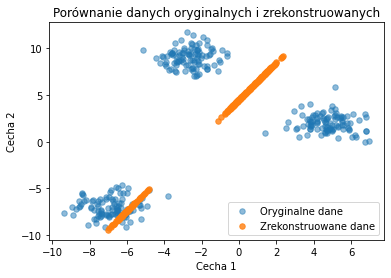

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs

# 1. Generowanie danych syntetycznych
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# 2. Wizualizacja danych w oryginalnej przestrzeni (2D)
plt.scatter(X[:, 0], X[:, 1], s=30, cmap='viridis')
plt.title("Dane w oryginalnej przestrzeni")
plt.xlabel("Cecha 1")
plt.ylabel("Cecha 2")
plt.show()

# 3. Zastosowanie PCA (redukcja wymiarowości do 1D)
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

# 4. Wizualizacja danych po redukcji wymiarowości
plt.scatter(X_pca, np.zeros_like(X_pca), s=30, cmap='viridis')
plt.title("Dane po PCA (redukcja do 1D)")
plt.xlabel("Główna składowa")
plt.show()

# 5. Odzyskanie oryginalnych współrzędnych (rekonstrukcja)
X_reconstructed = pca.inverse_transform(X_pca)

# 6. Wizualizacja rekonstrukcji
plt.scatter(X[:, 0], X[:, 1], s=30, alpha=0.5, label="Oryginalne dane")
plt.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], s=30, alpha=0.8, label="Zrekonstruowane dane")
plt.title("Porównanie danych oryginalnych i zrekonstruowanych")
plt.xlabel("Cecha 1")
plt.ylabel("Cecha 2")
plt.legend()
plt.show()


C:\Users\kamil\AppData\Local\Temp\ipykernel_18324\3453205172.py:11: MatplotlibDeprecationWarning: The clean function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use none, you no longer need to clean a Grouper instead.
  scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis', s=50)


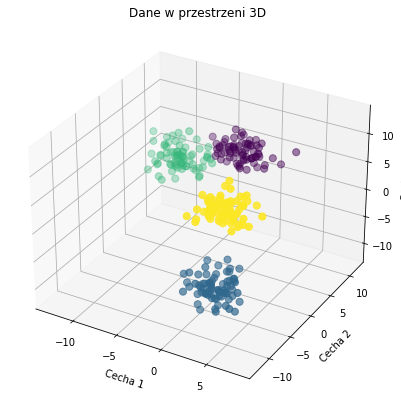

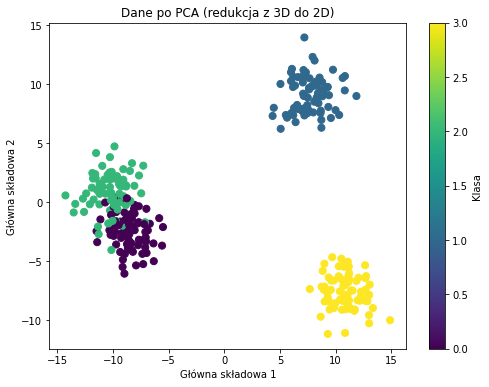

Wartości wyjaśnionej wariancji dla każdej składowej: [0.66274476 0.28634436]
Łączna wyjaśniona wariancja: 0.95


In [6]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs

# 1. Generowanie danych 3D
X, y = make_blobs(n_samples=300, centers=4, n_features=3, cluster_std=1.5, random_state=42)

# 2. Wizualizacja danych w 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis', s=50)
ax.set_title("Dane w przestrzeni 3D")
ax.set_xlabel("Cecha 1")
ax.set_ylabel("Cecha 2")
ax.set_zlabel("Cecha 3")
plt.show()

# 3. Redukcja wymiarowości z 3D do 2D za pomocą PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 4. Wizualizacja danych po redukcji do 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=50)
plt.title("Dane po PCA (redukcja z 3D do 2D)")
plt.xlabel("Główna składowa 1")
plt.ylabel("Główna składowa 2")
plt.colorbar(label="Klasa")
plt.show()

# 5. Wyświetlenie wyjaśnionej wariancji
explained_variance = pca.explained_variance_ratio_
print(f"Wartości wyjaśnionej wariancji dla każdej składowej: {explained_variance}")
print(f"Łączna wyjaśniona wariancja: {np.sum(explained_variance):.2f}")


## GeoAI - Geospatial Artificial Intelligence

GeoAI (Geospatial Artificial Intelligence) to dziedzina, która łączy uczenia maszynowe z analizą danych geoprzestrzennych. Celem GeoAI jest automatyzacja, modelowanie i analiza procesów przestrzennych oraz wspomaganie decyzji w obszarach związanych z lokalizacją i przestrzenią geograficzną.

Jest to względnie nowy trend - rynek dla usług GeoAI stale rośnie.

### Kluczowe elementy GeoAI:

1. Dane przestrzenne
    
        Często również oznacza to korzystanie z dużych zbiorów danych przestrzennych, takich jak OpenStreetMap, Copernicus, Google Earth Engine
    
2. Modele

        Istnieją modele "wzbogacone" o komponent przestrzenny, czyli zdolne do uwzględnienia komponentów przestrzennego i komponentu czasowego.
    
    
3. Integracja modeli z danymi przestrzennymi

        Analiza przestrzenna (Spatial Analysis): badanie wzorców, odległości i relacji między obiektami w przestrzeni.
        Systemy Informacji Geograficznej (GIS): wizualizacja i zarządzanie danymi geoprzestrzennymi.
        
Nie jest to zatem wyłącznie prostym stosowaniem modeli na danych przestrzennych.

### Kluczowe technologie wspierające GeoAI:

#### Wizja komputerowa (CV)

Analizuje wizualne dane geoprzestrzenne (obrazy satelitarne, lotnicze), identyfikując pokrycie terenu, infrastrukturę i zmiany w czasie. Wykorzystywana do mapowania, planowania miejskiego i reagowania na katastrofy.

#### Przetwarzanie języka naturalnego (NLP)

Analizuje dane tekstowe geoprzestrzenne, umożliwiając ekstrakcję informacji, analizę trendów i monitorowanie klęsk żywiołowych.

#### Teledetekcja

Korzysta z czujników na satelitach i samolotach, zbierając dane o powierzchni Ziemi, atmosferze i oceanach, co wspiera analizę geograficzną.

#### Big Data i przetwarzanie w chmurze
Dane przestrzenne zwykle są ogromne. Te technologie zapewniają skalowalne przechowywanie i przetwarzanie dużych zbiorów danych geoprzestrzennych.

#### Internet rzeczy (IoT)
Urządzenia z czujnikami i GPS dostarczają dane o środowisku, infrastrukturze i aktywności ludzi, wspierając decyzje oparte na danych.

#### Modele podstawowe (Foundationan models)
Modele głębokiego uczenia, takie jak Segment Anything czy Prithvi-100M, wstępnie trenowane na dużych zbiorach danych. Dzięki szerokiemu zrozumieniu świata pozwalają na adaptację do różnych zadań przy minimalnej ilości dodatkowych danych, co czyni je wydajniejszymi od tradycyjnych modeli ML. Istotne ze względu na objętości danych przestrzennych

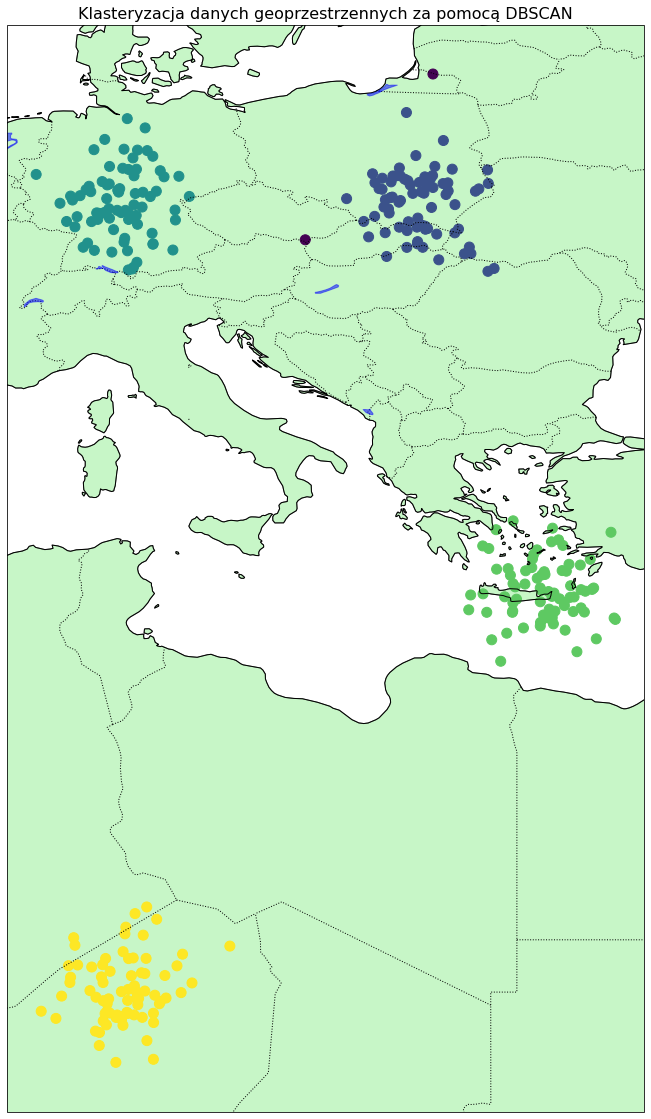

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Generowanie syntetycznych danych geoprzestrzennych
centers = [[10, 50.2], [21.1, 50.1], [25.9, 35.3], [10,20.3]]
X, _ = make_blobs(n_samples=300, centers=centers, cluster_std=1.3, random_state=42)

# Klasteryzacja danych za pomocą DBSCAN
dbscan = DBSCAN(eps=2, min_samples=5).fit(X)
labels = dbscan.labels_

# Tworzenie wykresu z wykorzystaniem Cartopy
fig, ax = plt.subplots(figsize=(20, 20), subplot_kw={'projection': ccrs.PlateCarree()})

# Dodawanie mapy świata i elementów geograficznych
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgreen', alpha=0.5)
ax.add_feature(cfeature.LAKES, edgecolor='blue', facecolor='blue', alpha=0.5)

# Rysowanie punktów danych
scatter = ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=100, transform=ccrs.PlateCarree())

# Dodawanie tytułu
ax.set_title("Klasteryzacja danych geoprzestrzennych za pomocą DBSCAN", fontsize=16)
# plt.colorbar(scatter, label="Klasy klastrów")
plt.show()


## Przykłady GeoAI:

### Przykład 1: Monitorowanie zmian klimatycznych

Problem: Obserwacja wylesień i nielegalnej ścinki drzew.

    Dane?
    Algorytmy?
    Cechy?
    Miary dokładności?
    Jak zastosować wyniki?
    
### Przykład 2: Optymalizacja ruchu drogowego w miastach

Problem: Codzienne korki utrudniają życie mieszkańcom dużych miast. Jak za pomocą GeoAI można zaplanować lepszy przepływ ruchu?

    Dane?
    Algorytmy?
    Cechy?
    Miary dokładności?
    Jak zastosować wyniki?
 
### Przykład 3: Zarządzanie kryzysowe po katastrofach naturalnych

Problem: Po huraganie trudno jest zidentyfikować najbardziej dotknięte obszary i zoptymalizować dostarczanie pomocy.

    Dane?
    Algorytmy?
    Cechy?
    Miary dokładności?
    Jak zastosować wyniki?